# Project 2: Difference Equations and Impulse Responses
This project examines linear-time invariant systems and their representations with diffeence equations, impulse responses and frequency responses.

## Objective:
1. We have the difference equation $$ y[n]-1.1y[n-1]+0.46y[n-2]=x[n]+0.04x[n-1]+0.76x[n-2]$$ which can be implemented using the <code>filt</code> command. Find the vectors <code>a</code> and <code>b</code> that satisfy this equation.


2. Create an impulse of length 40.
    1. Characterize the LTI system by finding the first 40 points of the impulse response.
    2. Plot the impulse response with <code>stem</code>.


3. Examine two ways of implementing an LTI system:
    1. Create a signal consisting of a 5--point unit height pulse followed by five zeros followed by another 5--point unit height pulse and then zeropadded to a total length of 40.
    2. Find the response of the system to an input signal using <code>conv</code> and <code>filt</code>.
    3. Are there differences?


4. Examine the frequency response:
    1. Find an expression for the frequency response of the system described by the difference equation.
    2. Plot the magnitude and phase response of the system.
    3. What type of filter does this resemble?


5. Examine the response to two sine waves:
    1. Create two signals $x_{1}[n]=\cos(0.1\pi n)$ and $x_{2}[n]=\sin(0.4\pi n)$ both of length 100.
    2. Filter each signal with the filter in step 1.
    3. Examine the frequency response of the system.
    4. Add the two signals and filter the sum of the two. Which does the result resemble more, $x_{1}[n]$ or $x_{2}[n]$?

## Solutions:

1. Given the difference equation, we find the vectors <code>a</code> and <code>b</code> by converting into frequency space. Let $z = e^{i\omega t}$

$$
\begin{aligned}
    Y(z)-1.1z^{-1}Y(z)+0.46z^{-2}Y(z)&=&X(z)+0.04z^{-1}X(z)+0.76z^{-2}X(z)\\
    Y(z)(1-1.1z^{-1}+0.46z^{-2})&=&X(z)(1+0.04z^{-1}+0.76z^{-2})\\
    \frac{Y(z)}{X(z)}&=&\frac{1+0.04z^{-1}+0.76z^{-2}}{1-1.1z^{-1}+0.46z^{-2}}
\end{aligned}
$$

Since $H(z)=Y(z)/X(z)$, the coefficients of the numerator and denominator determine the vectors <code>a</code> and <code>b</code> such that 

$$\begin{aligned}a&=&[1, -1.1, 0.46]\\ b&=&[1, 0.04, 0.76]\end{aligned}$$

2. The impulse chosen to characterize the impulse response of the system is defined as a single unit-height pulse followed by zero padding

In [106]:
function impulse(n)
    x1 = [1]
    x2 = zeros(Float32, (n-1, 1))
    return [x1; x2]
end

impulse (generic function with 1 method)

In [107]:
imp = impulse(40)

40×1 Matrix{Float32}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

The <code>filt</code> function is obtained from the <code>DSP</code> package (ensure <code>DSP</code> is installed via <code>using Pkg; Pkg.add("DSP")</code>)

In [108]:
using DSP
a = [1, -1.1, 0.46]
b = [1, 0.04, 0.76]
filter1 = filt(b,a,imp)

40×1 Matrix{Float64}:
  1.0
  1.1400000000000001
  1.5540000000000003
  1.1850000000000003
  0.5886600000000003
  0.10242600000000024
 -0.15811499999999984
 -0.22104245999999994
 -0.17041380600000003
 -0.08577565500000006
  ⋮
  7.917890575614241e-6
  1.2801710093658746e-5
  1.043965143824207e-5
  5.5948299389832555e-6
  1.3520732712902287e-6
 -1.0863411735130458e-6
 -1.8169289956578557e-6
 -1.4989049554076404e-6
 -8.130081129457908e-7

Finally the impulse response is visualized by using the <code>Plots</code> package (ensure <code>Plots</code> is installed via <code>using Pkg; Pkg.add("Plots")</code>)

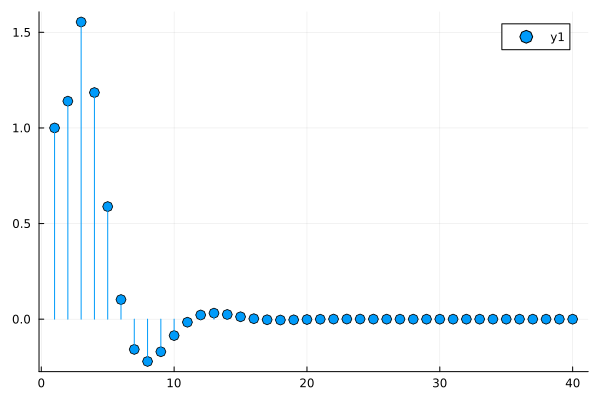

In [109]:
using Plots
plot(filter1, lines=:stem, marker=:o, markersize=5)

3. We construct the desired pulse similar to the previous

In [110]:
function fivepoint(n)
    x1 = [1]
    x2 = zeros(Float32, (5,1))
    x3 = [1]
    x4 = zeros(Float32, (n-(length(x1)+length(x2)+length(x3)),1))
    return 5*[x1; x2; x3; x4]
end

fivepoint (generic function with 1 method)

In [111]:
imp2 = fivepoint(40)

40×1 Matrix{Float32}:
 5.0
 0.0
 0.0
 0.0
 0.0
 0.0
 5.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

This can be convolved with the filter we have defined earlier and plotted

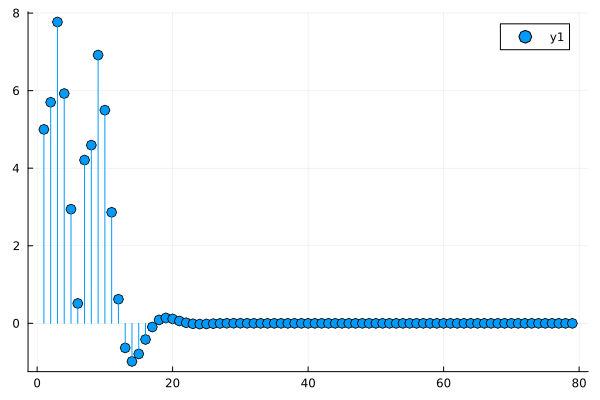

In [112]:
con = conv(filter1, imp2)
plot(con, lines=:stem, marker=:o, markersize=5)

Compared to the first impulse response, there are two bumps due to the input signal with their intensities are much larger. 

4. As found in the first solution, the frequency response is given by $$H(z)=\frac{1+0.04z^{-1}+0.76z^{-2}}{1-1.1z^{-1}+0.46z^{-2}}$$

**TBD**, <code>DSP.Filters.freqresp</code> is not working as intended, need to debug. The magnitude response shows that high frequencies are attenuated (can be shown via <code>freqz</code> in MATLAB).

5. The sine and cosine waves are created by two functions

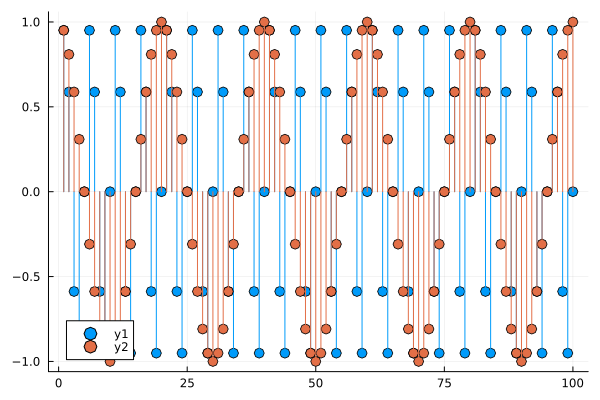

In [113]:
t = 1:100
y1 = sin.(0.4*pi*t)
y2 = cos.(0.1*pi*t)

plot(t, [y1,y2], lines=:stem, marker=:o, markersize=5)

These are then filtered separately with the vectors <code>a</code> and <code>b</code> to get

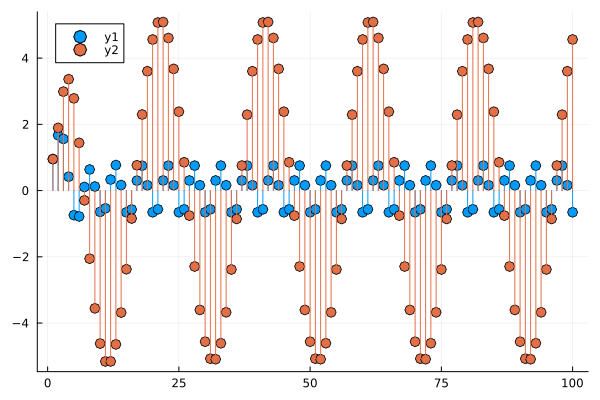

In [114]:
filt_sin = filt(b,a,y1)
filt_cos = filt(b,a,y2)

plot(t, [filt_sin, filt_cos], lines=:stem, marker=:o, markersize=5)

We add these signals and look at the result

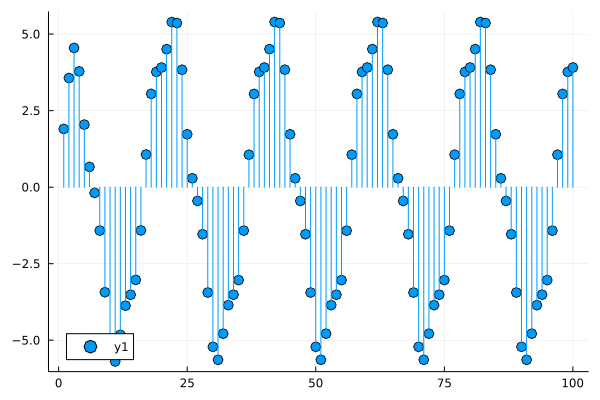

In [115]:
y3 = filt(b,a,y1+y2)
plot(t, y3, lines=:stem, marker=:o, markersize=5)

This more closely resembles <code>y2</code> due to the magnitude response of the filter. Low frequencies are amplified while high frequencies are reduced, causing the cosine to dominate the sum.